In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def read_csv_with_separators(file_path, separators):
    for sep in separators:
        df = pd.read_csv(file_path, sep=sep)
        if len(df.columns) > 1:
            return df
    raise ValueError(f"Could not read the file {file_path} with the provided separators.")

In [3]:
import pandas as pd

file1 = 'P:/LAB/Manuel/2023/2023-03/Microscopy/20230329_Double staining_2/20230329_RED.csv'
file2 = 'P:/LAB/Manuel/2023/2023-03/Microscopy/20230330_Double staining_3/20230330_RED.csv'
file3 = 'P:/LAB/Manuel/2023/2023-03/Microscopy/20230331_Double staining_4/20230331_RED.csv'

separators = [',', '\t']
df1 = read_csv_with_separators(file1, separators)
df2 = read_csv_with_separators(file2, separators)
df3 = read_csv_with_separators(file3, separators)

# Strip extra spaces from column names
df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()
df3.columns = df3.columns.str.strip()

In [4]:
# Step 3: Concatenate the data from the files
df = pd.concat([df1, df2, df3])

In [5]:
print(df.tail())
print(df.columns)

       NAME            IMAGE  INTENSITY.ch1.mean  INTENSITY.ch2.mean  \
2429  b1376  EM14439_RED_120          120.956730           115.69711   
2430  b1377  EM14439_RED_120          118.980950           112.61429   
2431  b1378  EM14439_RED_120          115.968056           128.11302   
2432  b1379  EM14439_RED_120          122.729034           119.52903   
2433  b1380  EM14439_RED_120          124.041100           128.66438   

      INTENSITY.ch3.mean  POSITION  SHAPE.area  Curvature  
2429           217.93270         5    1.646985   0.046243  
2430           251.36191         5    1.639584   0.049697  
2431           242.52335         5    3.209968   0.003537  
2432           222.21936         5    1.217661   0.019856  
2433           223.94520         5    1.168938   0.011312  
Index(['NAME', 'IMAGE', 'INTENSITY.ch1.mean', 'INTENSITY.ch2.mean',
       'INTENSITY.ch3.mean', 'POSITION', 'SHAPE.area', 'Curvature'],
      dtype='object')


In [6]:
mean_values = df.groupby('IMAGE')[['INTENSITY.ch1.mean', 'INTENSITY.ch2.mean','INTENSITY.ch3.mean']].mean()

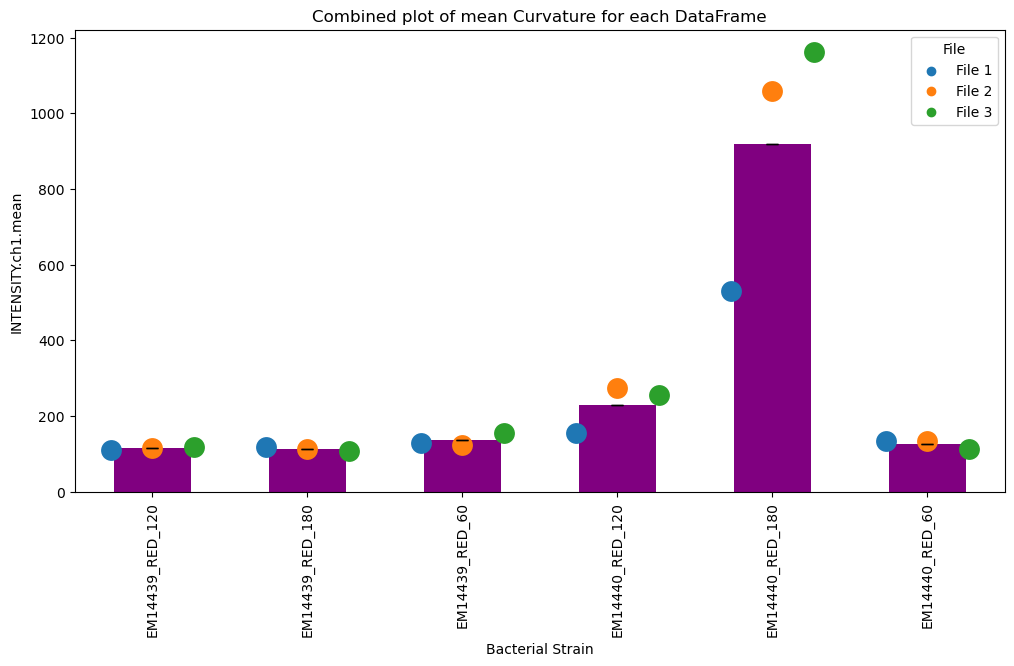

In [7]:
# Calculate the mean and standard deviation for each file separately
mean_file1 = df1.groupby('IMAGE')[['INTENSITY.ch1.mean', 'INTENSITY.ch2.mean','INTENSITY.ch3.mean']].mean()
mean_file2 = df2.groupby('IMAGE')[['INTENSITY.ch1.mean', 'INTENSITY.ch2.mean','INTENSITY.ch3.mean']].mean()
mean_file3 = df3.groupby('IMAGE')[['INTENSITY.ch1.mean', 'INTENSITY.ch2.mean','INTENSITY.ch3.mean']].mean()
# Calculate the combined mean and standard deviation between the two mean values
combined_mean = (mean_file1 + mean_file2 + mean_file3) / 3
std_dev = np.abs((mean_file1 - mean_file2) + (mean_file2 - mean_file3) + (mean_file3 - mean_file1)).std() / 3

# Create a DataFrame with the mean values and file labels
mean_file1['File'] = 'File 1'
mean_file2['File'] = 'File 2'
mean_file3['File'] = 'File 3'
mean_data = pd.concat([mean_file1.reset_index(), mean_file2.reset_index(), mean_file3.reset_index()])

# Create a single figure
plt.figure(figsize=(12, 6))

# 1. Swarm plot showing the mean of each DataFrame
sns.swarmplot(x='IMAGE', y='INTENSITY.ch1.mean', data=mean_data, hue='File', dodge=True, zorder=2, size = 15)

# 2. Histogram showing the average between the means of the 2 DataFrames
combined_mean['INTENSITY.ch1.mean'].plot(kind='bar', color='purple', zorder=1)

# 3. Histogram with error bars indicating the standard deviation between the 2 means
bar_width = 0.4
bar_positions = np.arange(len(combined_mean.index))
plt.bar(bar_positions, combined_mean['INTENSITY.ch1.mean'], width=bar_width, yerr=std_dev['INTENSITY.ch1.mean'], capsize=4, color='none', zorder=3)

# Set the title and labels
plt.title('Combined plot of mean Curvature for each DataFrame')
plt.xlabel('Bacterial Strain')
plt.ylabel('INTENSITY.ch1.mean')

# Set the x-axis tick labels
plt.xticks(bar_positions, combined_mean.index)

# Display the plot
plt.show()

C:\Users\halteman\AppData\Local\Temp\ipykernel_19036\2400034107.py:28: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.swarmplot(x='IMAGE', y='INTENSITY.ch1.mean', data=mean_data, hue='File', dodge=False, zorder=2, size = 10, order=custom_order, palette=sns.color_palette("colorblind"))


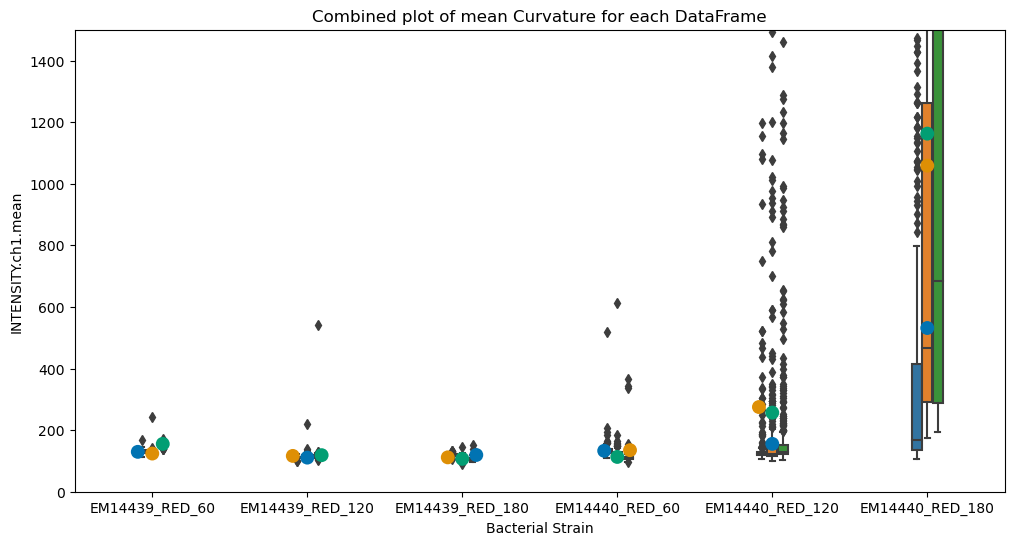

In [8]:
# Define the custom order of strains
custom_order = ['EM14439_RED_60', 'EM14439_RED_120', 'EM14439_RED_180', 'EM14440_RED_60','EM14440_RED_120','EM14440_RED_180']  # Add other strains if necessary

# Calculate the mean and standard deviation for each file separately
mean_file1 = df1.groupby('IMAGE')[['INTENSITY.ch1.mean', 'INTENSITY.ch2.mean','INTENSITY.ch3.mean']].mean()
mean_file2 = df2.groupby('IMAGE')[['INTENSITY.ch1.mean', 'INTENSITY.ch2.mean','INTENSITY.ch3.mean']].mean()
mean_file3 = df3.groupby('IMAGE')[['INTENSITY.ch1.mean', 'INTENSITY.ch2.mean','INTENSITY.ch3.mean']].mean()
# Calculate the combined mean and standard deviation between the two mean values
combined_mean = (mean_file1 + mean_file2 + mean_file3) / 3
std_dev = np.abs((mean_file1 - mean_file2) + (mean_file2 - mean_file3) + (mean_file3 - mean_file1)).std() / 3

# Create a DataFrame with the mean values and file labels
mean_file1['File'] = 'File 1'
mean_file2['File'] = 'File 2'
mean_file3['File'] = 'File 3'
mean_data = pd.concat([mean_file1.reset_index(), mean_file2.reset_index(), mean_file3.reset_index()])

# Add file labels to the original DataFrames
df1['File'] = 'File 1'
df2['File'] = 'File 2'
df3['File'] = 'File 3'
all_data = pd.concat([df1, df2, df3])

# Create a single figure
plt.figure(figsize=(12, 6))

# 1. Swarm plot showing the mean of each DataFrame
sns.swarmplot(x='IMAGE', y='INTENSITY.ch1.mean', data=mean_data, hue='File', dodge=False, zorder=2, size = 10, order=custom_order, palette=sns.color_palette("colorblind"))

# 2. Violin plot for the individual data points of both DataFrames
#sns.stripplot(x='IMAGE', y='INTENSITY.ch1.mean', data=all_data, hue='File', split = False, color='purple', order=custom_order, zorder=1)

# 3. Box plot instead of the histogram
sns.boxplot(x='IMAGE', y='INTENSITY.ch1.mean', data=all_data, hue='File', width=0.2, order=custom_order, zorder=1)

# 4. Error bars indicating the standard deviation between the 2 means
#bar_width = 2
#bar_positions = np.arange(len(combined_mean.index))
#plt.bar(bar_positions, combined_mean['INTENSITY.ch1.mean'], width=bar_width, yerr=std_dev['INTENSITY.ch1.mean'], capsize=10, color='blue', zorder=4)


# Set the title and labels
plt.title('Combined plot of mean Curvature for each DataFrame')
plt.xlabel('Bacterial Strain')
plt.ylabel('INTENSITY.ch1.mean')

# Set the x-axis tick labels
plt.xticks(bar_positions)

# Set the y-axis range
plt.ylim(0, 1500)
plt.legend().remove()
# Display the plot
plt.show()

C:\Users\halteman\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


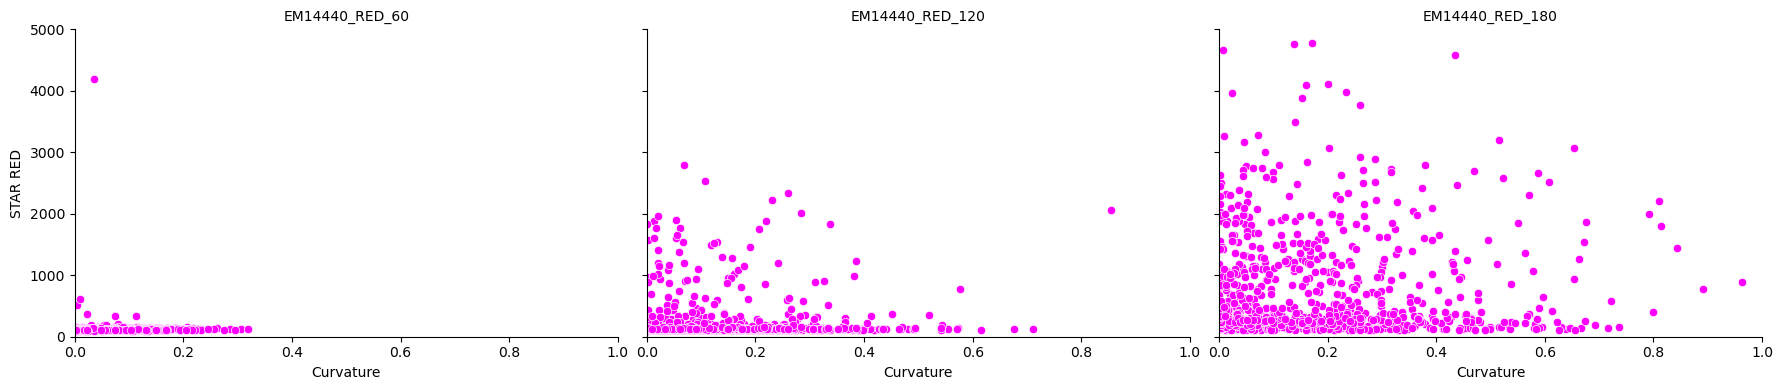

In [9]:
# Define the order of categories for the FacetGrid
category_order = ['EM14440_RED_60', 'EM14440_RED_120', 'EM14440_RED_180']

# Filter out the rows corresponding to the categories "EM14440" and "EM14439"
filtered_df = df[~df['IMAGE'].isin(['EM14439_RED_60', 'EM14439_RED_120', 'EM14439_RED_180'])]

# Create a FacetGrid with a separate subplot for each unique IMAGE
g = sns.FacetGrid(filtered_df, col='IMAGE', col_wrap=3, aspect=1.5, height=4, col_order=category_order)
g.map_dataframe(sns.scatterplot, x='Curvature', y='INTENSITY.ch1.mean', color='magenta')


# Set the titles and labels for the axes
g.set_axis_labels('Curvature', 'STAR RED')
g.set_titles(col_template="{col_name}")

# Add the legend
#g.add_legend(title="Source File")
plt.xlim(0,1)
plt.ylim(0, 5000)
#plt.savefig('MitoT-curvature.png', bbox_inches='tight')
# Show the plot
plt.show()

C:\Users\halteman\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


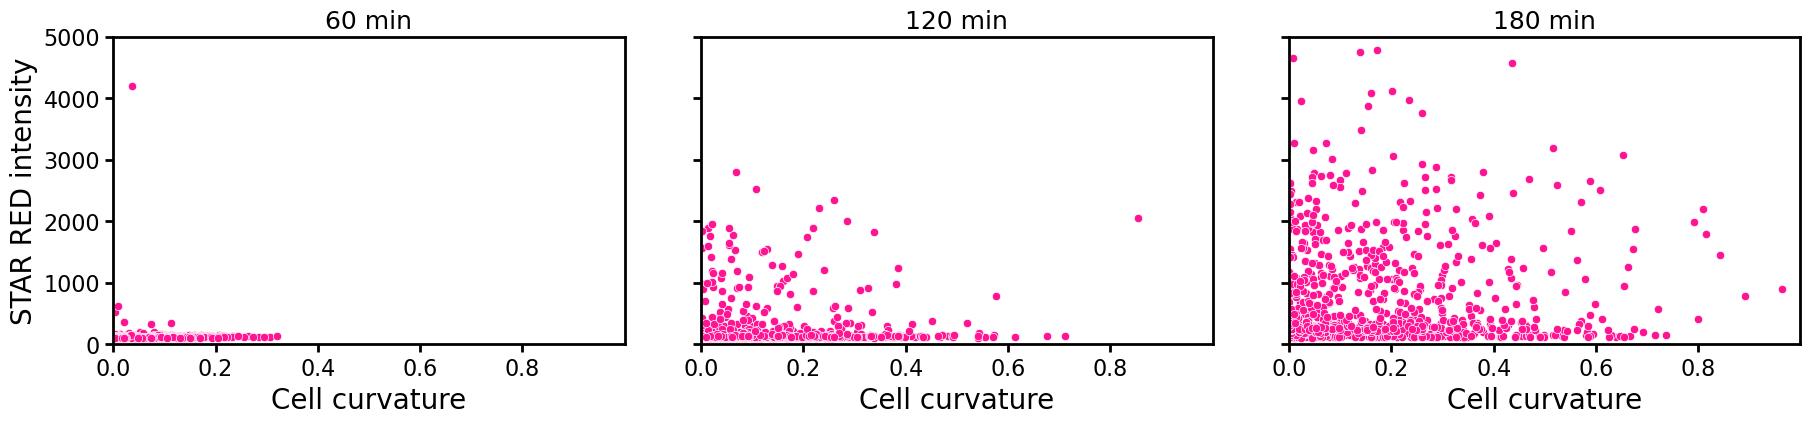

In [10]:
# Define the order of categories for the FacetGrid
category_order = ['EM14440_RED_60', 'EM14440_RED_120', 'EM14440_RED_180']
# Define custom titles
custom_titles = ['60 min', '120 min', '180 min']
# Filter out the rows corresponding to the categories "EM14440" and "EM14439"
filtered_df = df[~df['IMAGE'].isin(['EM14439_RED_60', 'EM14439_RED_120', 'EM14439_RED_180'])]

# Create a FacetGrid with a separate subplot for each unique IMAGE
g = sns.FacetGrid(filtered_df, col='IMAGE', col_wrap=3, aspect=1.5, height=4, col_order=category_order)
g.map_dataframe(sns.scatterplot, x='Curvature', y='INTENSITY.ch1.mean', color='#ff1493')


# Set the titles and labels for the axes
#g.set_axis_labels('STAR RED', 'MitoTacker')
#g.set_titles(col_template="{col_name}")

g.despine(top=False, right=False)  # Removes top and right spines for each facet


# Loop through the axes to set the spines, ticks, and custom titles
for i, ax in enumerate(g.axes.flat):
    # Set custom title
    ax.set_title(custom_titles[i], fontsize=18)  

for ax in g.axes.flat:
    ax.set_xlabel('Cell curvature', fontsize=20)  # Change x-axis label
    ax.set_ylabel('STAR RED intensity', fontsize=20)  # Change y-axis label

    ax.xaxis.set_tick_params(labelsize=16)  # Change x-axis tick size
    ax.yaxis.set_tick_params(labelsize=16)  # Change y-axis tick size
    
    ax.xaxis.set_ticks(np.arange(start=0, stop=1, step=0.2))  # example of setting ticks from 0 to 10 with step size of 1 on x-axis
    ax.yaxis.set_ticks(np.arange(start=0, stop=5001, step=1000))  # example of setting ticks from 0 to 10 with step size of 1 on y-axis    
    
    # Change the linewidth of x and y axis
    ax.spines['left'].set_linewidth(2)  
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['top'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
  
    # Change the size (width) of the ticks
    for tick in ax.xaxis.get_major_ticks():
        tick._apply_params(tickdir="out", size=6, width=2)
    for tick in ax.yaxis.get_major_ticks():
        tick._apply_params(tickdir="out", size=6, width=2)

      
        
# Adjust the layout to add space between subplots
g.fig.subplots_adjust(wspace=0.15, hspace=0.15)


#g.add_legend(title="Source File")
plt.xlim(0, 1)
plt.ylim(0, 5000)
#plt.savefig('RED-Curvature.png', bbox_inches='tight')
# Show the plot
plt.show()

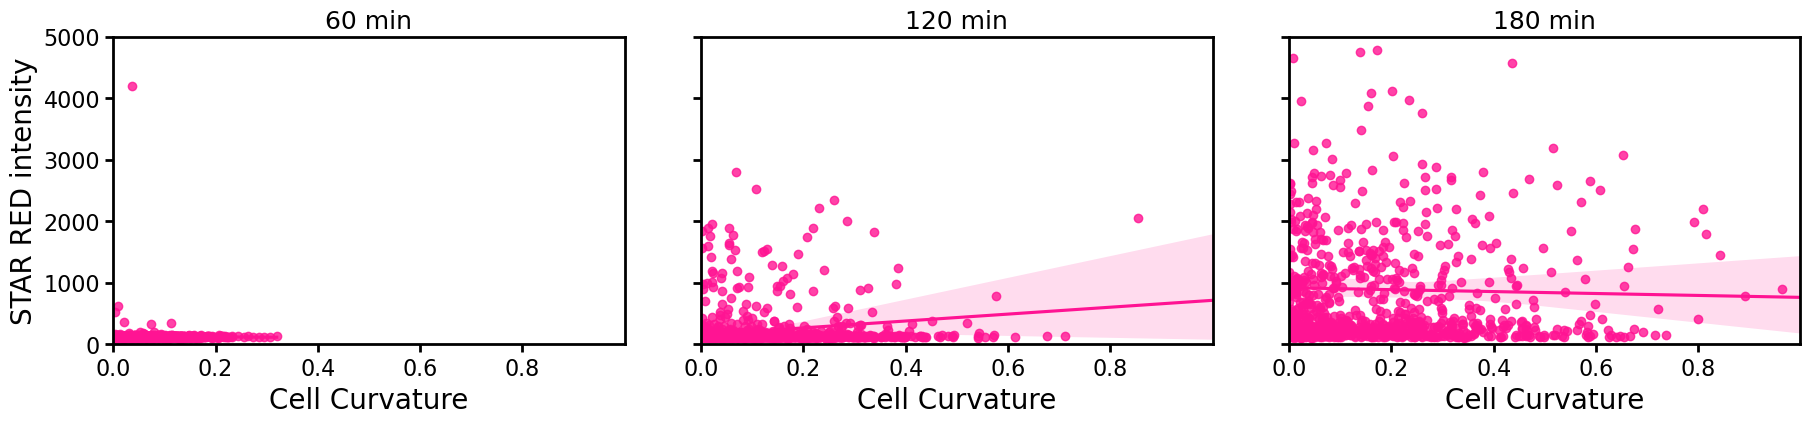

In [11]:
# Define the order of categories for the FacetGrid
category_order = ['EM14440_RED_60', 'EM14440_RED_120', 'EM14440_RED_180']
# Define custom titles
custom_titles = ['60 min', '120 min', '180 min']
# Filter out the rows corresponding to the categories "EM14440" and "EM14439"
filtered_df = df[~df['IMAGE'].isin(['EM14439_RED_60', 'EM14439_RED_120', 'EM14439_RED_180'])]

# Create a FacetGrid with a separate subplot for each unique IMAGE
g = sns.FacetGrid(filtered_df, col='IMAGE', col_wrap=3, aspect=1.5, height=4, col_order=category_order)
#g.map_dataframe(sns.scatterplot, x='INTENSITY.ch1.mean', y='INTENSITY.ch2.mean', color='magenta')

g.map_dataframe(sns.regplot, x='Curvature', y='INTENSITY.ch1.mean',
                scatter_kws={"color": "#ff1493"}, line_kws={"color": "#ff1493"}, ci=99.9, fit_reg=True)

# Set the titles and labels for the axes
g.set_axis_labels('Cell curvature', 'STAR RED intensity')
g.set_titles(col_template="{col_name}")


# Set the titles and labels for the axes
#g.set_axis_labels('STAR RED', 'MitoTacker')
#g.set_titles(col_template="{col_name}")

g.despine(top=False, right=False)  # Removes top and right spines for each facet


# Loop through the axes to set the spines, ticks, and custom titles
for i, ax in enumerate(g.axes.flat):
    # Set custom title
    ax.set_title(custom_titles[i], fontsize=18)  

for ax in g.axes.flat:
    ax.set_xlabel('Cell Curvature', fontsize=20)  # Change x-axis label
    ax.set_ylabel('STAR RED intensity', fontsize=20)  # Change y-axis label

    ax.xaxis.set_tick_params(labelsize=16)  # Change x-axis tick size
    ax.yaxis.set_tick_params(labelsize=16)  # Change y-axis tick size
    
    ax.xaxis.set_ticks(np.arange(start=0, stop=1, step=0.2))  # example of setting ticks from 0 to 10 with step size of 1 on x-axis
    ax.yaxis.set_ticks(np.arange(start=0, stop=5001, step=1000))  # example of setting ticks from 0 to 10 with step size of 1 on y-axis    
    
    # Change the linewidth of x and y axis
    ax.spines['left'].set_linewidth(2)  
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['top'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
  
    # Change the size (width) of the ticks
    for tick in ax.xaxis.get_major_ticks():
        tick._apply_params(tickdir="out", size=6, width=2)
    for tick in ax.yaxis.get_major_ticks():
        tick._apply_params(tickdir="out", size=6, width=2)
 
# Adjust the layout to add space between subplots
g.fig.subplots_adjust(wspace=0.15, hspace=0.15)

#g.add_legend(title="Source File")
plt.xlim(0, 1)
plt.ylim(0, 5000)
plt.savefig('RED-Curvature-StrippingPlot.tiff', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

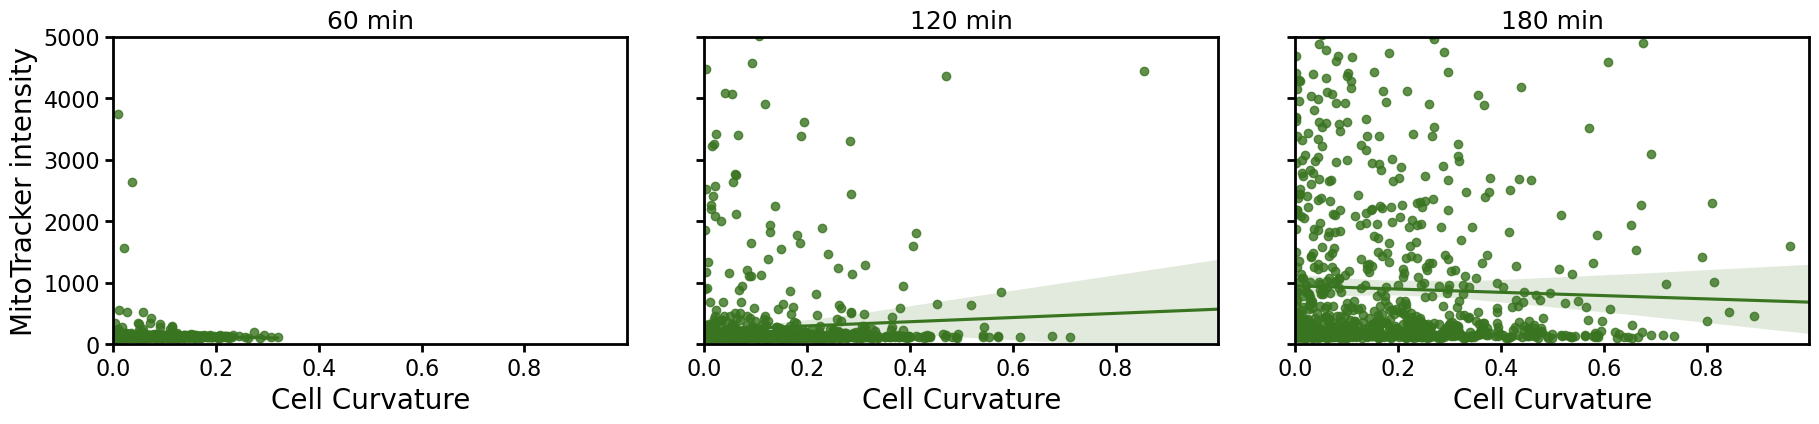

In [12]:
# Define the order of categories for the FacetGrid
category_order = ['EM14440_RED_60', 'EM14440_RED_120', 'EM14440_RED_180']
# Define custom titles
custom_titles = ['60 min', '120 min', '180 min']
# Filter out the rows corresponding to the categories "EM14440" and "EM14439"
filtered_df = df[~df['IMAGE'].isin(['EM14439_RED_60', 'EM14439_RED_120', 'EM14439_RED_180'])]

# Create a FacetGrid with a separate subplot for each unique IMAGE
g = sns.FacetGrid(filtered_df, col='IMAGE', col_wrap=3, aspect=1.5, height=4, col_order=category_order)
#g.map_dataframe(sns.scatterplot, x='INTENSITY.ch1.mean', y='INTENSITY.ch2.mean', color='magenta')

g.map_dataframe(sns.regplot, x='Curvature', y='INTENSITY.ch2.mean',
                scatter_kws={"color": "#397420"}, line_kws={"color": "#397420"}, ci=99.9, fit_reg=True)

# Set the titles and labels for the axes
g.set_axis_labels('Cell curvature', 'MitoTracker intensity')
g.set_titles(col_template="{col_name}")


# Set the titles and labels for the axes
#g.set_axis_labels('STAR RED', 'MitoTacker')
#g.set_titles(col_template="{col_name}")

g.despine(top=False, right=False)  # Removes top and right spines for each facet


# Loop through the axes to set the spines, ticks, and custom titles
for i, ax in enumerate(g.axes.flat):
    # Set custom title
    ax.set_title(custom_titles[i], fontsize=18)  

for ax in g.axes.flat:
    ax.set_xlabel('Cell Curvature', fontsize=20)  # Change x-axis label
    ax.set_ylabel('MitoTracker intensity', fontsize=20)  # Change y-axis label

    ax.xaxis.set_tick_params(labelsize=16)  # Change x-axis tick size
    ax.yaxis.set_tick_params(labelsize=16)  # Change y-axis tick size
    
    ax.xaxis.set_ticks(np.arange(start=0, stop=1, step=0.2))  # example of setting ticks from 0 to 10 with step size of 1 on x-axis
    ax.yaxis.set_ticks(np.arange(start=0, stop=5001, step=1000))  # example of setting ticks from 0 to 10 with step size of 1 on y-axis    
    
    # Change the linewidth of x and y axis
    ax.spines['left'].set_linewidth(2)  
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['top'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
  
    # Change the size (width) of the ticks
    for tick in ax.xaxis.get_major_ticks():
        tick._apply_params(tickdir="out", size=6, width=2)
    for tick in ax.yaxis.get_major_ticks():
        tick._apply_params(tickdir="out", size=6, width=2)

      
        
# Adjust the layout to add space between subplots
g.fig.subplots_adjust(wspace=0.15, hspace=0.15)


#g.add_legend(title="Source File")
plt.xlim(0, 1)
plt.ylim(0, 5000)
plt.savefig('MitoT-Curvature-StrippingPlot.tiff', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

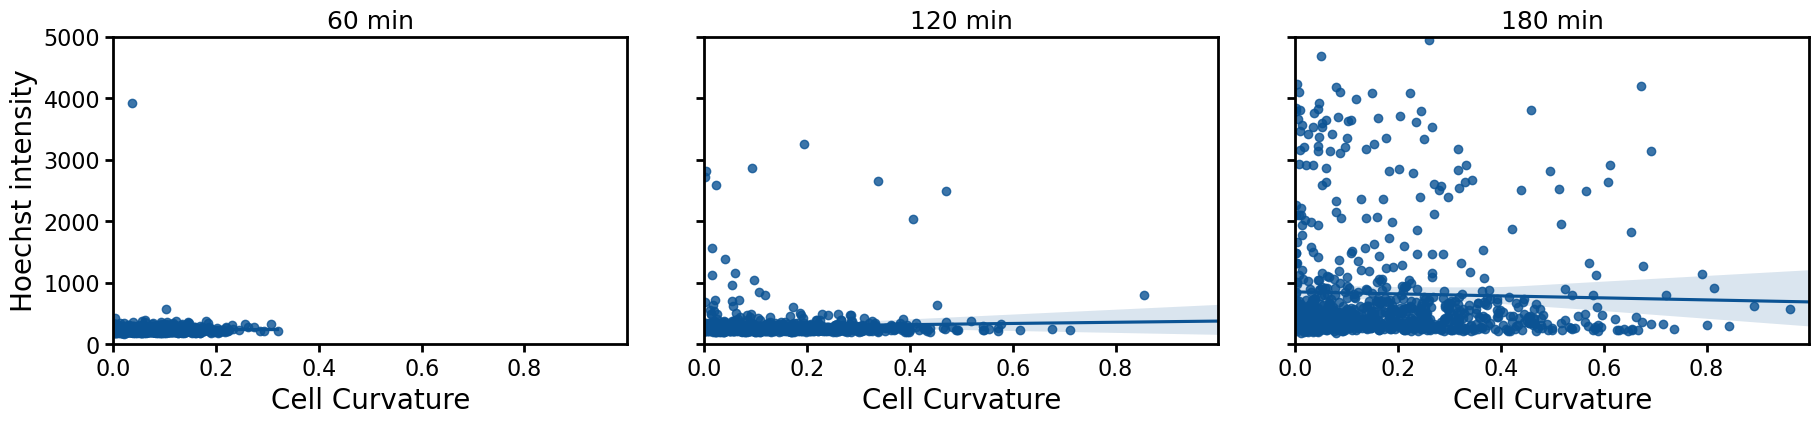

In [13]:
# Define the order of categories for the FacetGrid
category_order = ['EM14440_RED_60', 'EM14440_RED_120', 'EM14440_RED_180']
# Define custom titles
custom_titles = ['60 min', '120 min', '180 min']
# Filter out the rows corresponding to the categories "EM14440" and "EM14439"
filtered_df = df[~df['IMAGE'].isin(['EM14439_RED_60', 'EM14439_RED_120', 'EM14439_RED_180'])]

# Create a FacetGrid with a separate subplot for each unique IMAGE
g = sns.FacetGrid(filtered_df, col='IMAGE', col_wrap=3, aspect=1.5, height=4, col_order=category_order)
#g.map_dataframe(sns.scatterplot, x='INTENSITY.ch1.mean', y='INTENSITY.ch2.mean', color='magenta')

g.map_dataframe(sns.regplot, x='Curvature', y='INTENSITY.ch3.mean',
                scatter_kws={"color": "#0b5394"}, line_kws={"color": "#0b5394"}, ci=99.9, fit_reg=True)

# Set the titles and labels for the axes
g.set_axis_labels('Cell curvature', 'Hoechst intensity')
g.set_titles(col_template="{col_name}")


# Set the titles and labels for the axes
#g.set_axis_labels('STAR RED', 'MitoTacker')
#g.set_titles(col_template="{col_name}")

g.despine(top=False, right=False)  # Removes top and right spines for each facet


# Loop through the axes to set the spines, ticks, and custom titles
for i, ax in enumerate(g.axes.flat):
    # Set custom title
    ax.set_title(custom_titles[i], fontsize=18)  

for ax in g.axes.flat:
    ax.set_xlabel('Cell Curvature', fontsize=20)  # Change x-axis label
    ax.set_ylabel('Hoechst intensity', fontsize=20)  # Change y-axis label

    ax.xaxis.set_tick_params(labelsize=16)  # Change x-axis tick size
    ax.yaxis.set_tick_params(labelsize=16)  # Change y-axis tick size
    
    ax.xaxis.set_ticks(np.arange(start=0, stop=1, step=0.2))  # example of setting ticks from 0 to 10 with step size of 1 on x-axis
    ax.yaxis.set_ticks(np.arange(start=0, stop=5001, step=1000))  # example of setting ticks from 0 to 10 with step size of 1 on y-axis    
    
    # Change the linewidth of x and y axis
    ax.spines['left'].set_linewidth(2)  
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['top'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
  
    # Change the size (width) of the ticks
    for tick in ax.xaxis.get_major_ticks():
        tick._apply_params(tickdir="out", size=6, width=2)
    for tick in ax.yaxis.get_major_ticks():
        tick._apply_params(tickdir="out", size=6, width=2)
     
#Adjust the layout to add space between subplots
g.fig.subplots_adjust(wspace=0.15, hspace=0.15)

#g.add_legend(title="Source File")
plt.xlim(0, 1)
plt.ylim(0, 5000)
plt.savefig('Hoechst-Curvature-StrippingPlot.tiff', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

C:\Users\halteman\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


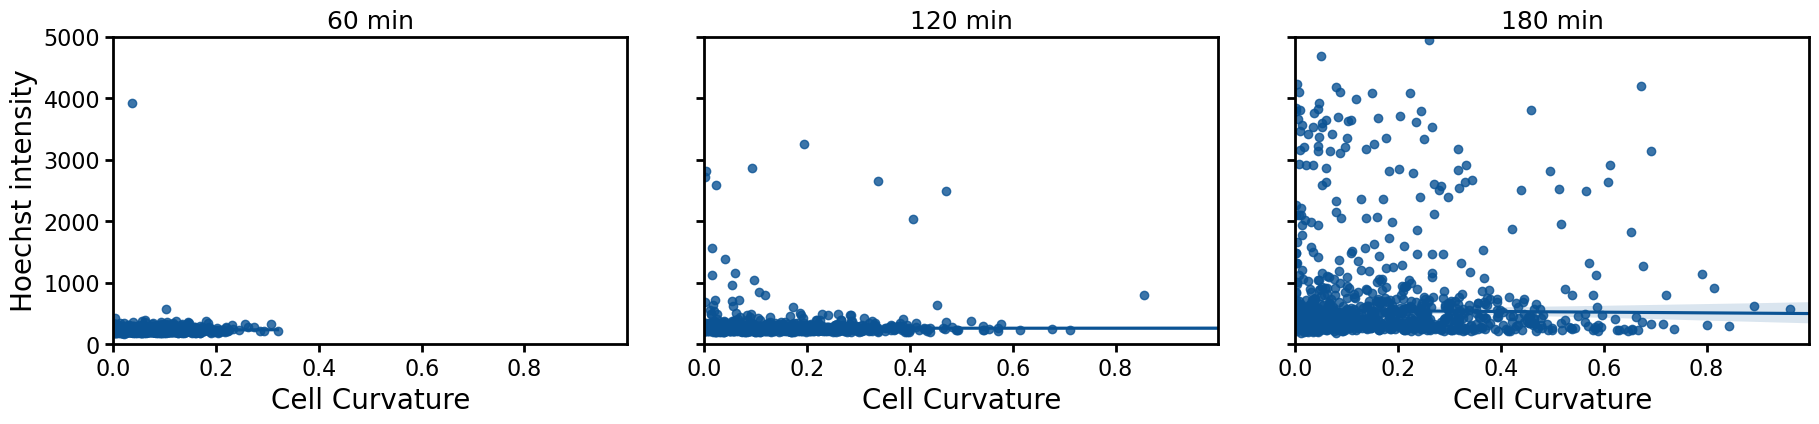

In [17]:
# TEST different regression types 
# Define the order of categories for the FacetGrid
category_order = ['EM14440_RED_60', 'EM14440_RED_120', 'EM14440_RED_180']
# Define custom titles
custom_titles = ['60 min', '120 min', '180 min']
# Filter out the rows corresponding to the categories "EM14440" and "EM14439"
filtered_df = df[~df['IMAGE'].isin(['EM14439_RED_60', 'EM14439_RED_120', 'EM14439_RED_180'])]

# Create a FacetGrid with a separate subplot for each unique IMAGE
g = sns.FacetGrid(filtered_df, col='IMAGE', col_wrap=3, aspect=1.5, height=4, col_order=category_order)
#g.map_dataframe(sns.scatterplot, x='INTENSITY.ch1.mean', y='INTENSITY.ch2.mean', color='magenta')

g.map_dataframe(sns.regplot, x='Curvature', y='INTENSITY.ch3.mean',
                scatter_kws={"color": "#0b5394"}, line_kws={"color": "#0b5394"}, ci=99.9, robust=True)

# Set the titles and labels for the axes
g.set_axis_labels('Cell curvature', 'Hoechst intensity')
g.set_titles(col_template="{col_name}")


# Set the titles and labels for the axes
#g.set_axis_labels('STAR RED', 'MitoTacker')
#g.set_titles(col_template="{col_name}")

g.despine(top=False, right=False)  # Removes top and right spines for each facet


# Loop through the axes to set the spines, ticks, and custom titles
for i, ax in enumerate(g.axes.flat):
    # Set custom title
    ax.set_title(custom_titles[i], fontsize=18)  

for ax in g.axes.flat:
    ax.set_xlabel('Cell Curvature', fontsize=20)  # Change x-axis label
    ax.set_ylabel('Hoechst intensity', fontsize=20)  # Change y-axis label

    ax.xaxis.set_tick_params(labelsize=16)  # Change x-axis tick size
    ax.yaxis.set_tick_params(labelsize=16)  # Change y-axis tick size
    
    ax.xaxis.set_ticks(np.arange(start=0, stop=1, step=0.2))  # example of setting ticks from 0 to 10 with step size of 1 on x-axis
    ax.yaxis.set_ticks(np.arange(start=0, stop=5001, step=1000))  # example of setting ticks from 0 to 10 with step size of 1 on y-axis    
    
    # Change the linewidth of x and y axis
    ax.spines['left'].set_linewidth(2)  
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['top'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
  
    # Change the size (width) of the ticks
    for tick in ax.xaxis.get_major_ticks():
        tick._apply_params(tickdir="out", size=6, width=2)
    for tick in ax.yaxis.get_major_ticks():
        tick._apply_params(tickdir="out", size=6, width=2)
     
#Adjust the layout to add space between subplots
g.fig.subplots_adjust(wspace=0.15, hspace=0.15)

#g.add_legend(title="Source File")
plt.xlim(0, 1)
plt.ylim(0, 5000)
#plt.savefig('Hoechst-Curvature-StrippingPlot.tiff', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

C:\Users\halteman\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\halteman\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


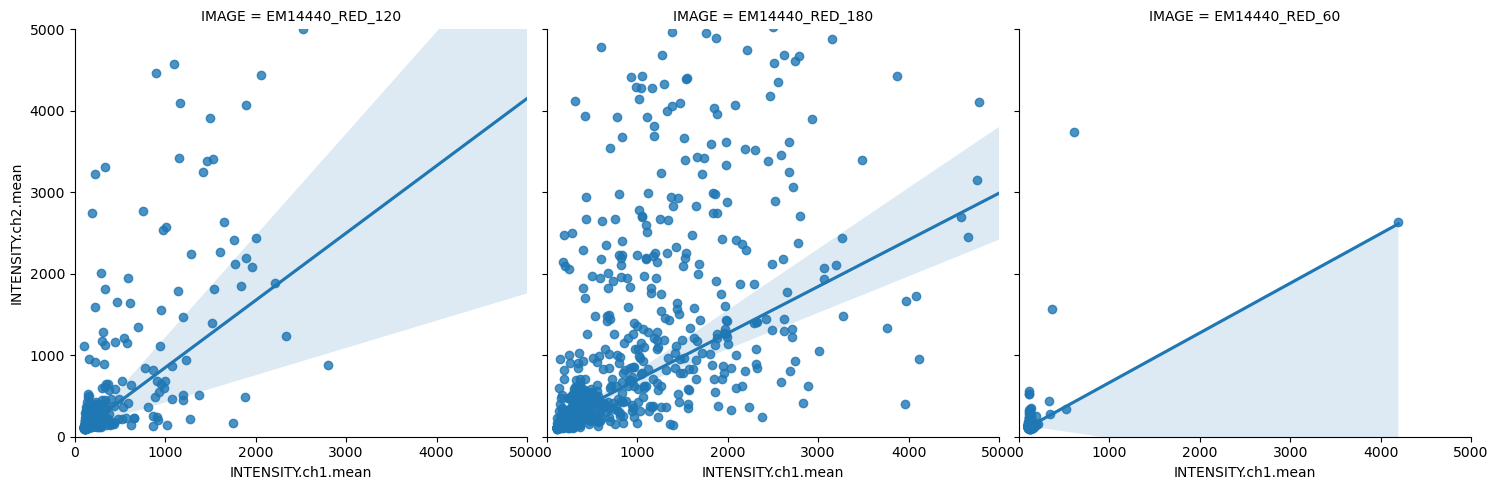

In [15]:
# Define the order of categories for the FacetGrid
category_order = ['EM14440_RED_60', 'EM14440_RED_120', 'EM14440_RED_180']

# Filter out the rows corresponding to the categories "EM14440" and "EM14439"
filtered_df = df[~df['IMAGE'].isin(['EM14439_RED_60', 'EM14439_RED_120', 'EM14439_RED_180'])]

sns.lmplot(data=filtered_df, x='INTENSITY.ch1.mean', y='INTENSITY.ch2.mean', col='IMAGE',
           robust=True, ci=99)

# Set the titles and labels for the axes
g.set_axis_labels('STAR RED', 'MitoTacker')
g.set_titles(col_template="{col_name}")

# Add the legend
#g.add_legend(title="Source File")
plt.xlim(0, 5000)
plt.ylim(0, 5000)
#plt.savefig('RED-MitoT.png', bbox_inches='tight')
# Show the plot
plt.show()

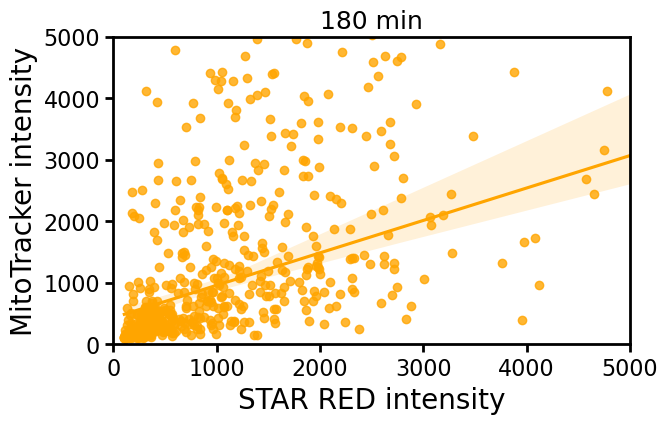

In [17]:
# Define the order of categories for the FacetGrid
category_order = ['EM14440_RED_180']
# Define custom titles
custom_titles = ['180 min']
# Filter out the rows corresponding to the categories "EM14440" and "EM14439"
filtered_df = df[~df['IMAGE'].isin(['EM14439_RED_60', 'EM14439_RED_120', 'EM14439_RED_180',
                                    'EM14440_RED_60','EM14440_RED_120'])]

# Create a FacetGrid with a separate subplot for each unique IMAGE
g = sns.FacetGrid(filtered_df, col='IMAGE', col_wrap=3, aspect=1.5, height=4, col_order=category_order)
#g.map_dataframe(sns.scatterplot, x='INTENSITY.ch1.mean', y='INTENSITY.ch2.mean', color='magenta')

g.map_dataframe(sns.regplot, x='INTENSITY.ch1.mean', y='INTENSITY.ch2.mean',
                scatter_kws={"color": "#ffa500"}, line_kws={"color": "#ffa500"}, ci=99.9, fit_reg=True)

# Set the titles and labels for the axes
g.set_axis_labels('STAR RED Intensity', 'MitoTracker intensity')
g.set_titles(col_template="{col_name}")


# Set the titles and labels for the axes
#g.set_axis_labels('STAR RED', 'MitoTacker')
#g.set_titles(col_template="{col_name}")

g.despine(top=False, right=False)  # Removes top and right spines for each facet


# Loop through the axes to set the spines, ticks, and custom titles
for i, ax in enumerate(g.axes.flat):
    # Set custom title
    ax.set_title(custom_titles[i], fontsize=18)  

for ax in g.axes.flat:
    ax.set_xlabel('STAR RED intensity', fontsize=20)  # Change x-axis label
    ax.set_ylabel('MitoTracker intensity', fontsize=20)  # Change y-axis label

    ax.xaxis.set_tick_params(labelsize=16)  # Change x-axis tick size
    ax.yaxis.set_tick_params(labelsize=16)  # Change y-axis tick size
    
    ax.xaxis.set_ticks(np.arange(start=0, stop=5001, step=1000))  # example of setting ticks from 0 to 10 with step size of 1 on x-axis
    ax.yaxis.set_ticks(np.arange(start=0, stop=5001, step=1000))  # example of setting ticks from 0 to 10 with step size of 1 on y-axis    
    
    # Change the linewidth of x and y axis
    ax.spines['left'].set_linewidth(2)  
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['top'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
  
    # Change the size (width) of the ticks
    for tick in ax.xaxis.get_major_ticks():
        tick._apply_params(tickdir="out", size=6, width=2)
    for tick in ax.yaxis.get_major_ticks():
        tick._apply_params(tickdir="out", size=6, width=2)
 
# Adjust the layout to add space between subplots
g.fig.subplots_adjust(wspace=0.15, hspace=0.15)

#g.add_legend(title="Source File")
plt.xlim(0, 5000)
plt.ylim(0, 5000)
plt.savefig('MitoT-RED-StrippingPlot-180min.tiff', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

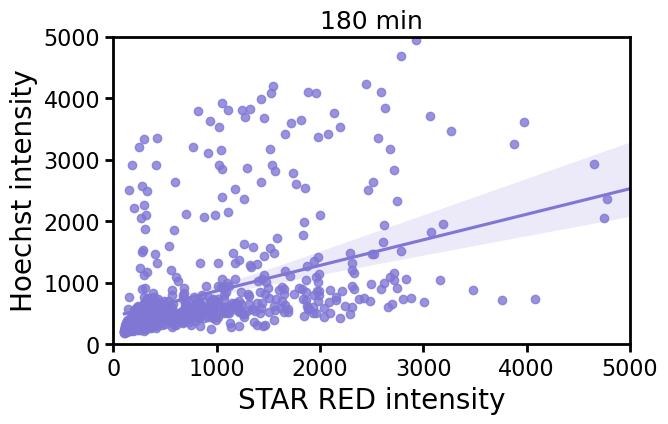

In [18]:
# Define the order of categories for the FacetGrid
category_order = ['EM14440_RED_180']
# Define custom titles
custom_titles = ['180 min']
# Filter out the rows corresponding to the categories "EM14440" and "EM14439"
filtered_df = df[~df['IMAGE'].isin(['EM14439_RED_60', 'EM14439_RED_120', 'EM14439_RED_180',
                                    'EM14440_RED_60','EM14440_RED_120'])]

# Create a FacetGrid with a separate subplot for each unique IMAGE
g = sns.FacetGrid(filtered_df, col='IMAGE', col_wrap=3, aspect=1.5, height=4, col_order=category_order)
#g.map_dataframe(sns.scatterplot, x='INTENSITY.ch1.mean', y='INTENSITY.ch2.mean', color='magenta')

g.map_dataframe(sns.regplot, x='INTENSITY.ch1.mean', y='INTENSITY.ch3.mean',
                scatter_kws={"color": "#8077D5"}, line_kws={"color": "#8077D5"}, ci=99.9, fit_reg=True)

# Set the titles and labels for the axes
g.set_axis_labels('STAR RED Intensity', 'Hoechst intensity')
g.set_titles(col_template="{col_name}")


# Set the titles and labels for the axes
#g.set_axis_labels('STAR RED', 'MitoTacker')
#g.set_titles(col_template="{col_name}")

g.despine(top=False, right=False)  # Removes top and right spines for each facet


# Loop through the axes to set the spines, ticks, and custom titles
for i, ax in enumerate(g.axes.flat):
    # Set custom title
    ax.set_title(custom_titles[i], fontsize=18)  

for ax in g.axes.flat:
    ax.set_xlabel('STAR RED intensity', fontsize=20)  # Change x-axis label
    ax.set_ylabel('Hoechst intensity', fontsize=20)  # Change y-axis label

    ax.xaxis.set_tick_params(labelsize=16)  # Change x-axis tick size
    ax.yaxis.set_tick_params(labelsize=16)  # Change y-axis tick size
    
    ax.xaxis.set_ticks(np.arange(start=0, stop=5001, step=1000))  # example of setting ticks from 0 to 10 with step size of 1 on x-axis
    ax.yaxis.set_ticks(np.arange(start=0, stop=5001, step=1000))  # example of setting ticks from 0 to 10 with step size of 1 on y-axis    
    
    # Change the linewidth of x and y axis
    ax.spines['left'].set_linewidth(2)  
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['top'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
  
    # Change the size (width) of the ticks
    for tick in ax.xaxis.get_major_ticks():
        tick._apply_params(tickdir="out", size=6, width=2)
    for tick in ax.yaxis.get_major_ticks():
        tick._apply_params(tickdir="out", size=6, width=2)
 
# Adjust the layout to add space between subplots
g.fig.subplots_adjust(wspace=0.15, hspace=0.15)

#g.add_legend(title="Source File")
plt.xlim(0, 5000)
plt.ylim(0, 5000)
plt.savefig('Hoechst-RED-StrippingPlot-180min.tiff', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

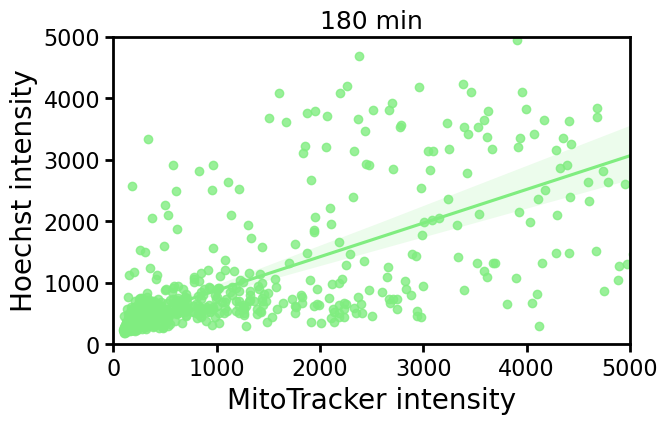

In [19]:
# Define the order of categories for the FacetGrid
category_order = ['EM14440_RED_180']
# Define custom titles
custom_titles = ['180 min']
# Filter out the rows corresponding to the categories "EM14440" and "EM14439"
filtered_df = df[~df['IMAGE'].isin(['EM14439_RED_60', 'EM14439_RED_120', 'EM14439_RED_180',
                                    'EM14440_RED_60','EM14440_RED_120'])]

# Create a FacetGrid with a separate subplot for each unique IMAGE
g = sns.FacetGrid(filtered_df, col='IMAGE', col_wrap=3, aspect=1.5, height=4, col_order=category_order)
#g.map_dataframe(sns.scatterplot, x='INTENSITY.ch1.mean', y='INTENSITY.ch2.mean', color='magenta')

g.map_dataframe(sns.regplot, x='INTENSITY.ch2.mean', y='INTENSITY.ch3.mean',
                scatter_kws={"color": "#80ED80"}, line_kws={"color": "#80ED80"}, ci=99.9, fit_reg=True)

# Set the titles and labels for the axes
g.set_axis_labels('MitoTracker Intensity', 'Hoechst intensity')
g.set_titles(col_template="{col_name}")

# Set the titles and labels for the axes
#g.set_axis_labels('STAR RED', 'MitoTacker')
#g.set_titles(col_template="{col_name}")

g.despine(top=False, right=False)  # Removes top and right spines for each facet

# Loop through the axes to set the spines, ticks, and custom titles
for i, ax in enumerate(g.axes.flat):
    # Set custom title
    ax.set_title(custom_titles[i], fontsize=18)  

for ax in g.axes.flat:
    ax.set_xlabel('MitoTracker intensity', fontsize=20)  # Change x-axis label
    ax.set_ylabel('Hoechst intensity', fontsize=20)  # Change y-axis label

    ax.xaxis.set_tick_params(labelsize=16)  # Change x-axis tick size
    ax.yaxis.set_tick_params(labelsize=16)  # Change y-axis tick size
    
    ax.xaxis.set_ticks(np.arange(start=0, stop=5001, step=1000))  # example of setting ticks from 0 to 10 with step size of 1 on x-axis
    ax.yaxis.set_ticks(np.arange(start=0, stop=5001, step=1000))  # example of setting ticks from 0 to 10 with step size of 1 on y-axis    
    
    # Change the linewidth of x and y axis
    ax.spines['left'].set_linewidth(2)  
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['top'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
  
    # Change the size (width) of the ticks
    for tick in ax.xaxis.get_major_ticks():
        tick._apply_params(tickdir="out", size=6, width=2)
    for tick in ax.yaxis.get_major_ticks():
        tick._apply_params(tickdir="out", size=6, width=2)
 
# Adjust the layout to add space between subplots
g.fig.subplots_adjust(wspace=0.15, hspace=0.15)

#g.add_legend(title="Source File")
plt.xlim(0, 5000)
plt.ylim(0, 5000)
plt.savefig('Hoechst-MitoTracker-StrippingPlot-180min.tiff', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

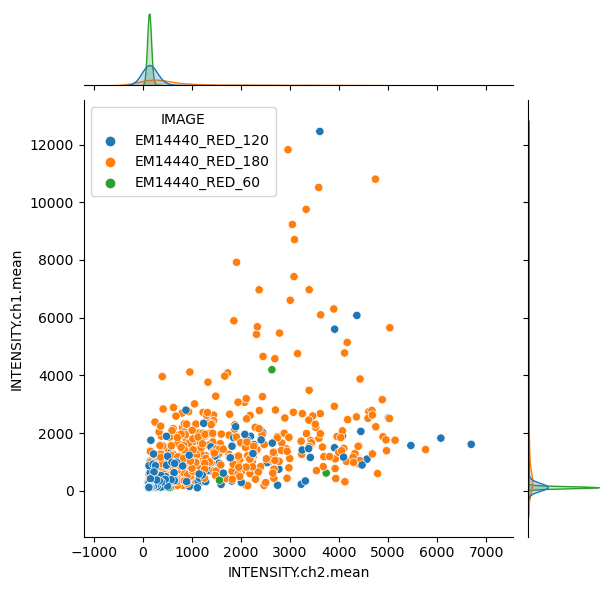

In [27]:
# Filter out the rows corresponding to the categories "EM14440" and "EM14439"
filtered_df = df[~df['IMAGE'].isin(['EM14439_RED_60', 'EM14439_RED_120', 'EM14439_RED_180'])]
filtered_df.reset_index(drop=True, inplace=True)

# Create the jointplot
g = sns.jointplot(x='INTENSITY.ch2.mean', y='INTENSITY.ch1.mean', data=filtered_df, hue='IMAGE')

# Set the x and y axes to base-2 logarithmic scale for the main plot
#g.ax_joint.set_yscale('log', basey=10)

# Set the x and y axes to base-2 logarithmic scale for the marginal plots

plt.show()

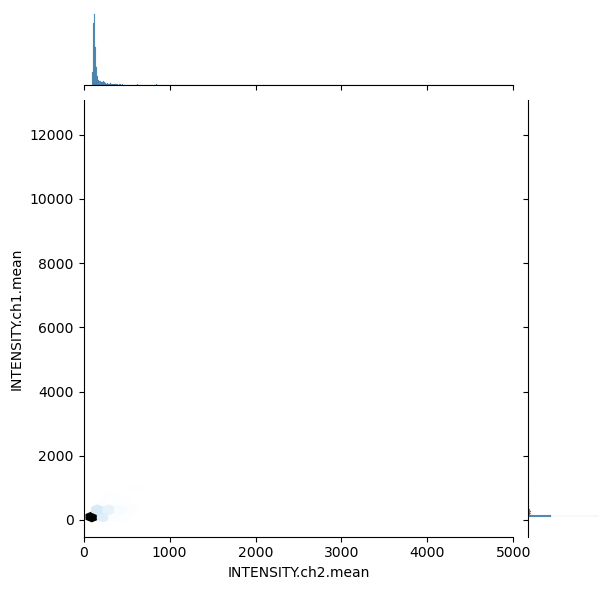

In [30]:
# Filter out the rows corresponding to the categories "EM14440" and "EM14439"
filtered_df = df[~df['IMAGE'].isin(['EM14439_RED_60', 'EM14439_RED_120', 'EM14439_RED_180'])]
filtered_df.reset_index(drop=True, inplace=True)

# Create the jointplot
g = sns.jointplot(x='INTENSITY.ch2.mean', y='INTENSITY.ch1.mean', data=filtered_df, kind="hex")

# Set the x and y axes to base-2 logarithmic scale for the main plot
#g.ax_joint.set_yscale('log', basey=10)

# Set the x and y axes to base-2 logarithmic scale for the marginal plots
#g.ax_marg_y.set_yscale('log', basey=10)
plt.xlim(0,5000)
#plt.ylim(0, 5000)
plt.show()

C:\Users\halteman\AppData\Local\Temp\ipykernel_14976\1829476834.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['INTENSITY.ch1.mean_binned'] = pd.cut(filtered_df['INTENSITY.ch1.mean'], bins, labels=bin_centers, include_lowest=True)
C:\Users\halteman\AppData\Local\Temp\ipykernel_14976\1829476834.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['INTENSITY.ch1.mean_binned'] = pd.to_numeric(filtered_df['INTENSITY.ch1.mean_binned'])


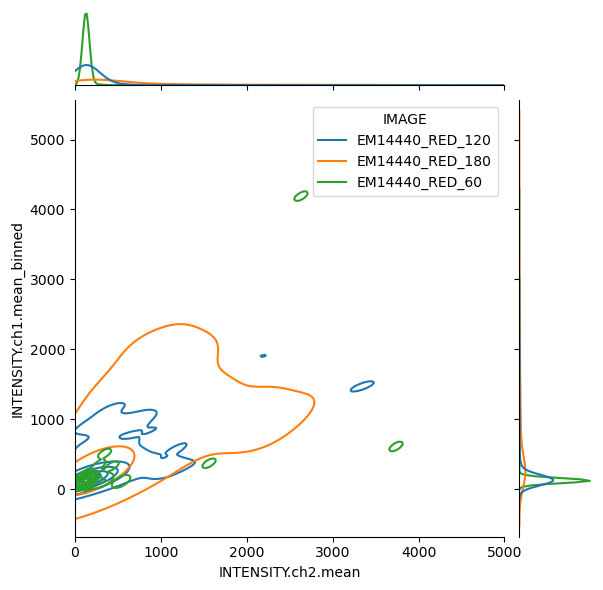

In [32]:
# Filter out the rows
filtered_df = df[~df['IMAGE'].isin(['EM14439_RED_60', 'EM14439_RED_120', 'EM14439_RED_180'])]

# Create bins for the y values
bins = np.arange(0, 5050, 20)  # Bins from 0 to 5000, every 50
bin_centers = 0.5 * (bins[:-1] + bins[1:])  # Calculate bin midpoints
filtered_df['INTENSITY.ch1.mean_binned'] = pd.cut(filtered_df['INTENSITY.ch1.mean'], bins, labels=bin_centers, include_lowest=True)

# Convert binned data to numeric
filtered_df['INTENSITY.ch1.mean_binned'] = pd.to_numeric(filtered_df['INTENSITY.ch1.mean_binned'])

# Reset index
filtered_df.reset_index(drop=True, inplace=True)

# Create the jointplot using the binned y values
g = sns.jointplot(x='INTENSITY.ch2.mean', y='INTENSITY.ch1.mean_binned', data=filtered_df, hue="IMAGE", kind="kde")

plt.xlim(0, 5000)
plt.show()

C:\Users\halteman\AppData\Local\Temp\ipykernel_14976\3158307493.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['INTENSITY.ch1.mean_binned'] = pd.cut(filtered_df['INTENSITY.ch1.mean'], bins, labels=bin_centers, include_lowest=True)
C:\Users\halteman\AppData\Local\Temp\ipykernel_14976\3158307493.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['INTENSITY.ch1.mean_binned'] = pd.to_numeric(filtered_df['INTENSITY.ch1.mean_binned'])


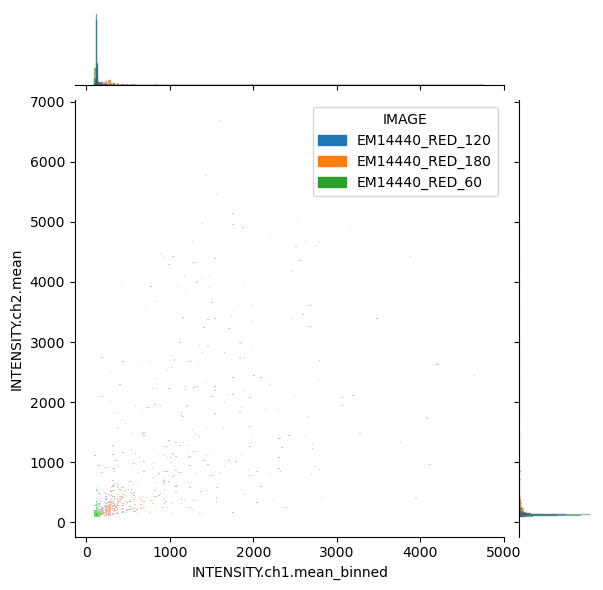

In [36]:
# Filter out the rows
filtered_df = df[~df['IMAGE'].isin(['EM14439_RED_60', 'EM14439_RED_120', 'EM14439_RED_180'])]

# Create bins for the y values
bins = np.arange(0, 5050, 10)  # Bins from 0 to 5000, every 50
bin_centers = 0.5 * (bins[:-1] + bins[1:])  # Calculate bin midpoints
filtered_df['INTENSITY.ch1.mean_binned'] = pd.cut(filtered_df['INTENSITY.ch1.mean'], bins, labels=bin_centers, include_lowest=True)

# Convert binned data to numeric
filtered_df['INTENSITY.ch1.mean_binned'] = pd.to_numeric(filtered_df['INTENSITY.ch1.mean_binned'])

# Reset index
filtered_df.reset_index(drop=True, inplace=True)

# Create the jointplot
g = sns.jointplot(x="INTENSITY.ch1.mean_binned", y="INTENSITY.ch2.mean", data=filtered_df, hue='IMAGE', kind='hist')

# Set the x and y axes to logarithmic scale for the main plot
#g.ax_joint.set_xscale('log')
#g.ax_joint.set_yscale('log')

# Set the x and y axes to logarithmic scale for the marginal plots
#g.ax_marg_x.set_xscale('log')
#g.ax_marg_y.set_yscale('log')

plt.show()